In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Starting with books and works

In [3]:
df_works = pd.read_pickle('Works_wrangled.pkl')

In [4]:
df_works.head()

,books_count,reviews_count,original_publication_month,text_reviews_count,best_book_id,original_publication_year,original_title,rating_dist,ratings_count,media_type,ratings_sum,work_id
0,1,6,8,1,5333265,1984,W. C. Fields: A Life on Film,5:1|4:1|3:1|2:0|1:0|total:3,3,book,12,5400751
1,22,10162,,741,25717,2001,Good Harbor,5:517|4:1787|3:2763|2:966|1:196|total:6229,6229,book,20150,1323437
2,2,268,,7,7327624,1987,,5:49|4:58|3:26|2:5|1:3|total:141,141,book,568,8948723
3,38,89252,7,3504,6066819,2009,Best Friends Forever,5:9152|4:16855|3:19507|2:6210|1:1549|total:53273,53273,book,185670,6243154
4,2,49,,5,287140,1990,Runic Astrology: Starcraft and Timekeeping in ...,5:6|4:1|3:3|2:3|1:2|total:15,15,book,51,278577


In [5]:
df_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521962 entries, 0 to 1521961
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   books_count                 1521962 non-null  int64 
 1   reviews_count               1521962 non-null  int64 
 2   original_publication_month  1521962 non-null  object
 3   text_reviews_count          1521962 non-null  int64 
 4   best_book_id                1521962 non-null  int64 
 5   original_publication_year   1521962 non-null  object
 6   original_title              1521962 non-null  object
 7   rating_dist                 1521962 non-null  object
 8   ratings_count               1521962 non-null  int64 
 9   media_type                  1521962 non-null  object
 10  ratings_sum                 1521962 non-null  int64 
 11  work_id                     1521962 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 139.3+ MB


In [7]:
df_works.nunique()

books_count                       628
reviews_count                   27553
original_publication_month         13
text_reviews_count               4794
best_book_id                  1521962
original_publication_year        1264
original_title                 611914
rating_dist                    691714
ratings_count                   19463
media_type                          5
ratings_sum                     37952
work_id                       1521962
dtype: int64

In [8]:
df_works.media_type.unique()

array(['book', '', 'not a book', 'periodical', 'article'], dtype=object)

In [9]:
df_works.media_type.value_counts()

book          1102395
               414096
periodical       3472
not a book       1668
article           331
Name: media_type, dtype: int64

In [18]:
#keeping book and "". 
dr = ['periodical', 'not a book', 'article']
dr_in = df_works[df_works.media_type.isin(dr)].index
df_works.drop(dr_in,inplace=True)

In [19]:
df_works.media_type.unique()

array(['book', ''], dtype=object)

In [22]:
df_works.work_id = df_works.work_id.astype("object")

In [23]:
df_works.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516491 entries, 0 to 1521961
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   books_count                 1516491 non-null  int64 
 1   reviews_count               1516491 non-null  int64 
 2   original_publication_month  1516491 non-null  object
 3   text_reviews_count          1516491 non-null  int64 
 4   best_book_id                1516491 non-null  int64 
 5   original_publication_year   1516491 non-null  object
 6   original_title              1516491 non-null  object
 7   rating_dist                 1516491 non-null  object
 8   ratings_count               1516491 non-null  int64 
 9   media_type                  1516491 non-null  object
 10  ratings_sum                 1516491 non-null  int64 
 11  work_id                     1516491 non-null  object
dtypes: int64(6), object(6)
memory usage: 150.4+ MB


In [24]:
df_works.best_book_id = df_works.best_book_id.astype("object")

In [27]:
df_works = df_works.replace(r'^\s*$', np.nan, regex=True)

In [29]:
df_works.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516491 entries, 0 to 1521961
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   books_count                 1516491 non-null  int64 
 1   reviews_count               1516491 non-null  int64 
 2   original_publication_month  1031685 non-null  object
 3   text_reviews_count          1516491 non-null  int64 
 4   best_book_id                1516491 non-null  int64 
 5   original_publication_year   1264760 non-null  object
 6   original_title              644126 non-null   object
 7   rating_dist                 1516491 non-null  object
 8   ratings_count               1516491 non-null  int64 
 9   media_type                  1102395 non-null  object
 10  ratings_sum                 1516491 non-null  int64 
 11  work_id                     1516491 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 150.4+ MB


In [30]:
df_works.work_id = df_works.work_id.astype("object")

In [31]:
df_works.best_book_id = df_works.best_book_id.astype("object")

In [32]:
df_works.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516491 entries, 0 to 1521961
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   books_count                 1516491 non-null  int64 
 1   reviews_count               1516491 non-null  int64 
 2   original_publication_month  1031685 non-null  object
 3   text_reviews_count          1516491 non-null  int64 
 4   best_book_id                1516491 non-null  object
 5   original_publication_year   1264760 non-null  object
 6   original_title              644126 non-null   object
 7   rating_dist                 1516491 non-null  object
 8   ratings_count               1516491 non-null  int64 
 9   media_type                  1102395 non-null  object
 10  ratings_sum                 1516491 non-null  int64 
 11  work_id                     1516491 non-null  object
dtypes: int64(5), object(7)
memory usage: 150.4+ MB


In [33]:
df_works.rating_dist

0                               5:1|4:1|3:1|2:0|1:0|total:3
1                5:517|4:1787|3:2763|2:966|1:196|total:6229
2                          5:49|4:58|3:26|2:5|1:3|total:141
3          5:9152|4:16855|3:19507|2:6210|1:1549|total:53273
4                              5:6|4:1|3:3|2:3|1:2|total:15
                                 ...                       
1521957                       5:13|4:5|3:3|2:1|1:0|total:22
1521958                         5:0|4:0|3:0|2:2|1:0|total:2
1521959                       5:5|4:10|3:4|2:0|1:0|total:19
1521960                         5:1|4:2|3:2|2:1|1:0|total:6
1521961                      5:12|4:18|3:8|2:2|1:0|total:40
Name: rating_dist, Length: 1516491, dtype: object

In [34]:
df_works.ratings_count

0              3
1           6229
2            141
3          53273
4             15
           ...  
1521957       22
1521958        2
1521959       19
1521960        6
1521961       40
Name: ratings_count, Length: 1516491, dtype: int64

In [37]:
#We have the total. Just need to extract dist. 
#df_works.explode('rating_dist')

,books_count,reviews_count,original_publication_month,text_reviews_count,best_book_id,original_publication_year,original_title,rating_dist,ratings_count,media_type,ratings_sum,work_id
0,1,6,8,1,5333265,1984,W. C. Fields: A Life on Film,5:1|4:1|3:1|2:0|1:0|total:3,3,book,12,5400751
1,22,10162,NaN,741,25717,2001,Good Harbor,5:517|4:1787|3:2763|2:966|1:196|total:6229,6229,book,20150,1323437
2,2,268,NaN,7,7327624,1987,NaN,5:49|4:58|3:26|2:5|1:3|total:141,141,book,568,8948723
3,38,89252,7,3504,6066819,2009,Best Friends Forever,5:9152|4:16855|3:19507|2:6210|1:1549|total:53273,53273,book,185670,6243154
4,2,49,NaN,5,287140,1990,Runic Astrology: Starcraft and Timekeeping in ...,5:6|4:1|3:3|2:3|1:2|total:15,15,book,51,278577
...,...,...,...,...,...,...,...,...,...,...,...,...
1521957,5,55,9,1,331839,2002,NaN,5:13|4:5|3:3|2:1|1:0|total:22,22,NaN,96,25313618
1521958,1,8,5,3,18069148,2013,NaN,5:0|4:0|3:0|2:2|1:0|total:2,2,book,4,25365816
1521959,4,34,7,3,3084038,1996,This Sceptred Isle: 1837-1901,5:5|4:10|3:4|2:0|1:0|total:19,19,book,77,3115103
1521960,4,709,8,2,26168430,2015,NaN,5:1|4:2|3:2|2:1|1:0|total:6,6,book,21,46130263


In [54]:
df_works.work_id.value_counts()

2311821     1
2762389     1
6956682     1
1451900     1
21906749    1
           ..
36011411    1
26525887    1
41205954    1
13942979    1
48854202    1
Name: work_id, Length: 1516491, dtype: int64

In [60]:
df_works.original_title.value_counts()[df_works.original_title.value_counts()>1].count()

18037

In [82]:
cols_nums = ['books_count','reviews_count','original_publication_month','text_reviews_count','ratings_count','original_publication_year','ratings_sum']

In [88]:
cols_nums[0]

'books_count'

In [85]:
df_works[cols_nums[0]].describe()

count    1.516491e+06
mean     4.557627e+00
std      1.710136e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      3.676000e+03
Name: books_count, dtype: float64

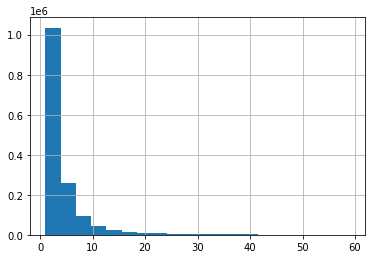

In [79]:
df_works.books_count[df_works.books_count<60].hist(bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x19159ad00>,
 'caps': [<matplotlib.lines.Line2D at 0x1916375b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1915709a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1916c6e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1916fcd00>],
 'means': []}

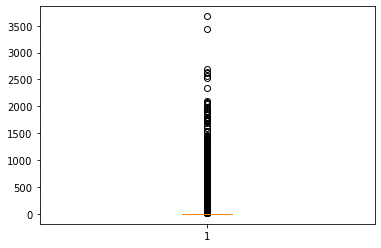

In [80]:
plt.boxplot(df_works.books_count)

In [89]:
cols_nums[1]

'reviews_count'

In [90]:
df_works[cols_nums[1]].describe()

count    1.516491e+06
mean     1.229762e+03
std      2.074381e+04
min     -6.069000e+03
25%      1.800000e+01
50%      7.600000e+01
75%      3.280000e+02
max      6.057595e+06
Name: reviews_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19e39a910>,
 'caps': [<matplotlib.lines.Line2D at 0x19e6bb670>,
 'boxes': [<matplotlib.lines.Line2D at 0x17362be20>],
 'medians': [<matplotlib.lines.Line2D at 0x19e1a73d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e1f2670>],
 'means': []}

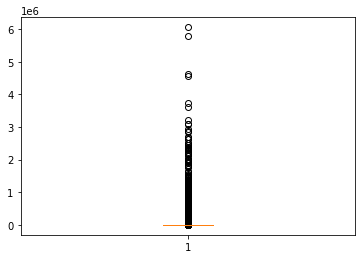

In [91]:
plt.boxplot(df_works[cols_nums[1]])

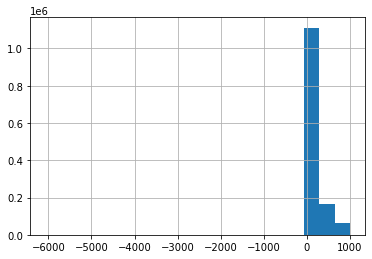

In [95]:
df_works[cols_nums[1]][df_works[cols_nums[1]]<1000].hist(bins=20)

In [97]:
abs(df_works_nums[cols_nums[1]][df_works_nums[cols_nums[1]]<0])

8448       1306
120239        1
187372        1
224794     6069
233901     3479
284931      718
326708        7
445438        1
498574        1
517844        9
523844        6
540719        1
553571        1
602015        1
609694        1
610915        4
626724        9
652872        2
682178        6
724814       14
732048     3494
751994        1
762975        1
767167        1
772531        1
865572       14
875723        1
887171       50
893702       55
901976        1
920405       55
938766        1
958733        6
984466        1
1016545       1
1025883      23
1238945       5
1252374      10
1265542       6
1282890       1
1317893       1
1374686       4
1471637       1
1479122       2
1489754       1
1497618       1
Name: reviews_count, dtype: int64

In [103]:
df_works.reviews_count = df_works.reviews_count.abs()

In [104]:
df_works[cols_nums[1]].describe()

count    1.516491e+06
mean     1.229782e+03
std      2.074381e+04
min      0.000000e+00
25%      1.800000e+01
50%      7.600000e+01
75%      3.280000e+02
max      6.057595e+06
Name: reviews_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1abd9cbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abdf7bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abd6fe50>],
 'medians': [<matplotlib.lines.Line2D at 0x1abe53bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abe7f3d0>],
 'means': []}

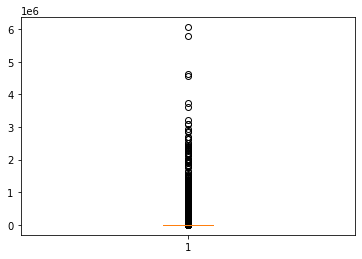

In [105]:
plt.boxplot(df_works[cols_nums[1]])

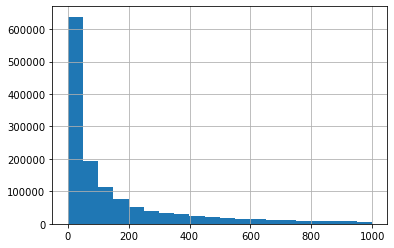

In [106]:
df_works[cols_nums[1]][df_works[cols_nums[1]]<1000].hist(bins=20)

In [107]:
cols_nums[2]

'original_publication_month'

In [108]:
df_works[cols_nums[2]].describe()

count     1031685
unique         12
top             1
freq       222468
Name: original_publication_month, dtype: object

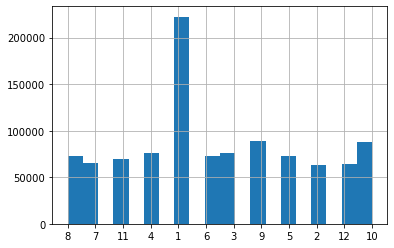

In [110]:
df_works[cols_nums[2]].hist(bins=20)

In [111]:
cols_nums[3]

'text_reviews_count'

In [112]:
df_works[cols_nums[3]].describe()

count    1.516491e+06
mean     4.456668e+01
std      5.680537e+02
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.600000e+01
max      1.565750e+05
Name: text_reviews_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1adfb0670>,
 'caps': [<matplotlib.lines.Line2D at 0x190a32370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1adf82670>],
 'medians': [<matplotlib.lines.Line2D at 0x191552760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a074bcd0>],
 'means': []}

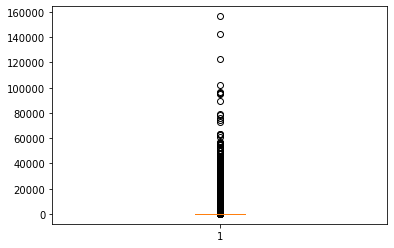

In [113]:
plt.boxplot(df_works[cols_nums[3]])

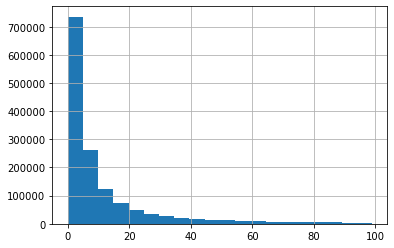

In [120]:
df_works[cols_nums[3]][df_works[cols_nums[3]]<100].hist(bins=20)

In [121]:
cols_nums[4]

'ratings_count'

In [122]:
df_works[cols_nums[4]].describe()

count    1.516491e+06
mean     6.442702e+02
std      1.480997e+04
min      0.000000e+00
25%      7.000000e+00
50%      2.600000e+01
75%      1.100000e+02
max      5.066596e+06
Name: ratings_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6d30130>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6d8a130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6d04130>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6de6130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6e03910>],
 'means': []}

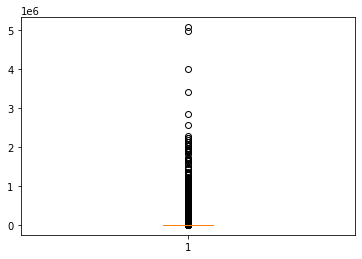

In [123]:
plt.boxplot(df_works[cols_nums[4]])

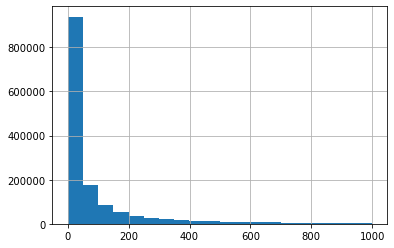

In [124]:
df_works[cols_nums[4]][df_works[cols_nums[4]]<1000].hist(bins=20)

In [125]:
cols_nums[5]

'original_publication_year'

In [126]:
df_works[cols_nums[5]].describe()

count     1264760
unique       1261
top          2014
freq       124654
Name: original_publication_year, dtype: object

In [138]:
df_works[cols_nums[5]]

0          1984
1          2001
2          1987
3          2009
4          1990
           ... 
1521957    2002
1521958    2013
1521959    1996
1521960    2015
1521961    1996
Name: original_publication_year, Length: 1516491, dtype: object

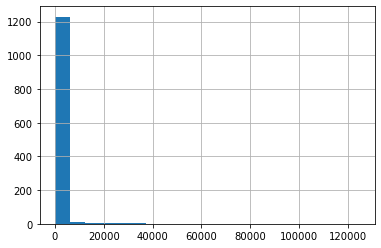

In [129]:
df_works[cols_nums[5]].value_counts().hist(bins=20)

In [139]:
cols_nums[6]

'ratings_sum'

In [140]:
df_works[cols_nums[6]].describe()

count    1.516491e+06
mean     2.575164e+03
std      6.099868e+04
min      0.000000e+00
25%      2.600000e+01
50%      1.010000e+02
75%      4.230000e+02
max      2.211059e+07
Name: ratings_sum, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x3c06818b0>,
 'caps': [<matplotlib.lines.Line2D at 0x3c06c8310>,
 'boxes': [<matplotlib.lines.Line2D at 0x3c0681520>],
 'medians': [<matplotlib.lines.Line2D at 0x3c075ccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3c075ce50>],
 'means': []}

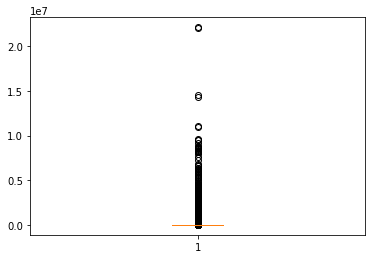

In [141]:
plt.boxplot(df_works[cols_nums[6]])

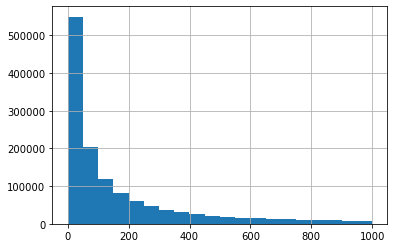

In [143]:
df_works[cols_nums[6]][df_works[cols_nums[6]]<1000].hist(bins=20)

### On to series list 

In [145]:
df_series = pd.read_pickle('Series_wrangled.pkl')

In [146]:
df_series.head()

,numbered,series_works_count,series_id,primary_work_count
0,true,9,189911,3
1,true,14,151854,12
2,true,15,169353,15
3,true,3,1052227,3
4,false,3,1070125,3


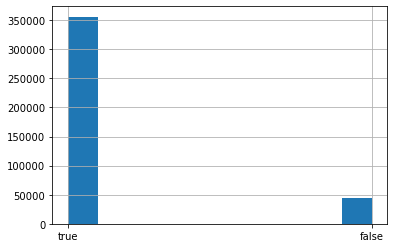

In [148]:
df_series.numbered.hist()

In [150]:
df_series.series_works_count.describe()

count    400390.000000
mean         21.588149
std          65.103100
min         -14.000000
25%           3.000000
50%           6.000000
75%          14.000000
max         893.000000
Name: series_works_count, dtype: float64

In [152]:
df_series.series_works_count = df_series.series_works_count.abs()

In [153]:
df_series.series_works_count.describe()

count    400390.000000
mean         21.588359
std          65.103030
min           0.000000
25%           3.000000
50%           6.000000
75%          14.000000
max         893.000000
Name: series_works_count, dtype: float64

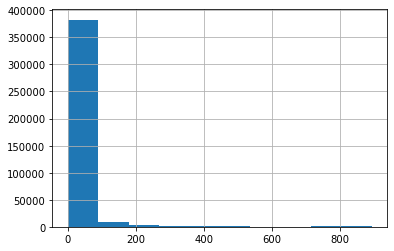

In [154]:
df_series.series_works_count.hist()

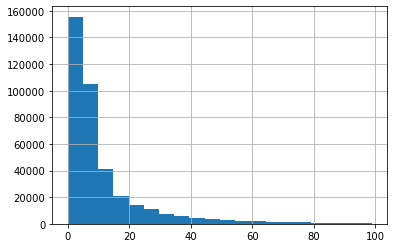

In [157]:
df_series.series_works_count[df_series.series_works_count<100].hist(bins=20)

In [162]:
df_series.series_id.nunique(), df_series.series_id.value_counts(), 

(400390,
 1054717    1
 774447     1
 661782     1
 917349     1
 157976     1
           ..
 975990     1
 453751     1
 955512     1
 957561     1
 524288     1
 Name: series_id, Length: 400390, dtype: int64)

In [164]:
df_series.primary_work_count.describe()

count    400390.000000
mean         19.771653
std          63.501377
min           0.000000
25%           3.000000
50%           5.000000
75%          12.000000
max         893.000000
Name: primary_work_count, dtype: float64

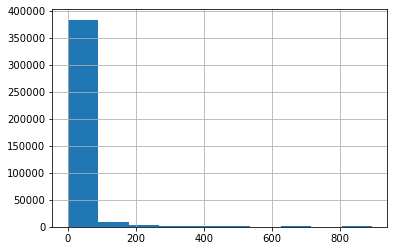

In [165]:
df_series.primary_work_count.hist()

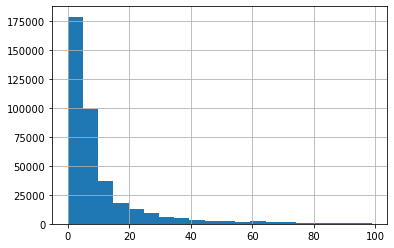

In [167]:
df_series.primary_work_count[df_series.primary_work_count<100].hist(bins=20)

### On to books list (contains duplicates)

In [181]:
df_books = pd.read_pickle('Books_wrangled.pkl')

In [182]:
df_books.head()

,text_reviews_count,series,country_code,language_code,is_ebook,average_rating,format,publisher,num_pages,publication_month,...,ratings_count,work_id,title,title_without_series,1st_au_id,1st_au_role,2nd_au_id,2nd_au_role,3rd_au_id,3rd_au_role
0,15,169353,US,eng,false,3.93,Hardcover,Simon & Schuster UK,400,4,...,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)",37778,Author,NaN,NaN,NaN,NaN
1,60,1052227,US,eng,true,4.33,Ebook,NaN,318,NaN,...,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),242185,Author,NaN,NaN,NaN,NaN
2,23,953679,US,eng,true,3.49,Ebook,Amazon Digital Services,NaN,NaN,...,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...,15104629,Author,14425713,Contributor,NaN,NaN
3,8,408775,US,eng,false,3.30,Hardcover,Ulverscroft,NaN,12,...,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)",190988,Author,NaN,NaN,NaN,NaN
5,3,199039,US,eng,false,3.96,Audiobook,HarperAudio,NaN,3,...,5,2288775,A Murder is Announced,A Murder is Announced,123715,Author,552417,Narrator,NaN,NaN


Drop country code (all US), edition information,language code (assumed all english), and 3rd author

In [183]:
col_todrop = ['publisher','country_code','edition_information','language_code','3rd_au_id','3rd_au_role']

In [184]:
df_books.drop(col_todrop, inplace=True,axis=1)

In [185]:
df_books.head()

,text_reviews_count,series,is_ebook,average_rating,format,num_pages,publication_month,publication_year,book_id,ratings_count,work_id,title,title_without_series,1st_au_id,1st_au_role,2nd_au_id,2nd_au_role
0,15,169353,false,3.93,Hardcover,400,4,2009,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)",37778,Author,NaN,NaN
1,60,1052227,true,4.33,Ebook,318,NaN,NaN,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),242185,Author,NaN,NaN
2,23,953679,true,3.49,Ebook,NaN,NaN,NaN,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...,15104629,Author,14425713,Contributor
3,8,408775,false,3.30,Hardcover,NaN,12,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)",190988,Author,NaN,NaN
5,3,199039,false,3.96,Audiobook,NaN,3,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced,123715,Author,552417,Narrator


In [186]:
df_books.work_id.value_counts()[df_books.work_id.value_counts()>10]

3311984     115
1222101     112
1997473      87
3038872      85
1303710      82
           ... 
1939982      11
32395679     11
49193186     11
10636        11
24084386     11
Name: work_id, Length: 1441, dtype: int64

# Finalize our Books data set. Use "best_book_id" and ignore format for the first run. 

In [187]:
df_books.head()

,text_reviews_count,series,is_ebook,average_rating,format,num_pages,publication_month,publication_year,book_id,ratings_count,work_id,title,title_without_series,1st_au_id,1st_au_role,2nd_au_id,2nd_au_role
0,15,169353,false,3.93,Hardcover,400,4,2009,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)",37778,Author,NaN,NaN
1,60,1052227,true,4.33,Ebook,318,NaN,NaN,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),242185,Author,NaN,NaN
2,23,953679,true,3.49,Ebook,NaN,NaN,NaN,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...,15104629,Author,14425713,Contributor
3,8,408775,false,3.30,Hardcover,NaN,12,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)",190988,Author,NaN,NaN
5,3,199039,false,3.96,Audiobook,NaN,3,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced,123715,Author,552417,Narrator


In [188]:
df_series.head()

,numbered,series_works_count,series_id,primary_work_count
0,true,9,189911,3
1,true,14,151854,12
2,true,15,169353,15
3,true,3,1052227,3
4,false,3,1070125,3


In [189]:
df_works.head()

,books_count,reviews_count,original_publication_month,text_reviews_count,best_book_id,original_publication_year,original_title,rating_dist,ratings_count,media_type,ratings_sum,work_id
0,1,6,8,1,5333265,1984,W. C. Fields: A Life on Film,"5:1,4:1,3:1,2:0,1:0,total:3",3,book,12,5400751
1,22,10162,NaN,741,25717,2001,Good Harbor,"5:517,4:1787,3:2763,2:966,1:196,total:6229",6229,book,20150,1323437
2,2,268,NaN,7,7327624,1987,NaN,"5:49,4:58,3:26,2:5,1:3,total:141",141,book,568,8948723
3,38,89252,7,3504,6066819,2009,Best Friends Forever,"5:9152,4:16855,3:19507,2:6210,1:1549,total:53273",53273,book,185670,6243154
4,2,49,NaN,5,287140,1990,Runic Astrology: Starcraft and Timekeeping in ...,"5:6,4:1,3:3,2:3,1:2,total:15",15,book,51,278577


In [194]:
def clean_ratings(row):
  tokens = row.split(",")
  for token in tokens[:-1]:
    [stars, num] = token.split(":")

In [192]:
df_rats = df_works.rating_dist

In [198]:
len(df_rats)

1516491

In [206]:
for i in range(5):
    print(clean_ratings(df_rats[i]))

None
None
None
None
None


In [219]:
def clean_ratings(row):
  tokens = row.split(",")

In [220]:
clean_ratings(df_rats[1])

AttributeError: 'Series' object has no attribute 'split'

In [218]:
tokens

NameError: name 'tokens' is not defined

In [214]:
df_rats = df_rats.str.split(pat=',', n=-1, expand=True)

In [217]:
df_rats[0].str.split(pat=':', n=-1, expand=True)

,0,1
0,5,1
1,5,517
2,5,49
3,5,9152
4,5,6
...,...,...
1521957,5,13
1521958,5,0
1521959,5,5
1521960,5,1
